In [113]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [114]:
df= pd.read_csv("D:\\machine learning\\Datasets\\kc_house_data.csv")

In [115]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [116]:
df.drop(['id', 'date', 'bathrooms','sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'], axis=1, inplace= True)

In [117]:
df.head()

,price,bedrooms,sqft_living
0,221900.0,3,1180
1,538000.0,3,2570
2,180000.0,2,770
3,604000.0,4,1960
4,510000.0,3,1680


In [118]:
len(df)

21613

In [119]:
df.isnull().sum()

price          0
bedrooms       0
sqft_living    0
dtype: int64

In [120]:
#convert dataset scaler form
from sklearn import preprocessing
sx = preprocessing.MinMaxScaler()
sy = preprocessing.MinMaxScaler()

scaled_X = sx.fit_transform(df.drop('price',axis='columns'))
scaled_y = sx.fit_transform(df['price'].values.reshape(df.shape[0],1))

In [121]:
scaled_X

array([[0.09090909, 0.06716981],
       [0.09090909, 0.17207547],
       [0.06060606, 0.03622642],
       ...,
       [0.06060606, 0.05509434],
       [0.09090909, 0.09886792],
       [0.06060606, 0.05509434]])

In [122]:
scaled_y

array([[0.01926557],
       [0.06072131],
       [0.01377049],
       ...,
       [0.04289849],
       [0.04262295],
       [0.03278689]])

In [123]:
def batch_gradient_descent(X, y_true, epochs, learning_rate = 0.01):

    number_of_features = X.shape[1]
    #number_of_features = 2 (area, bedroom)
    w = np.ones(shape=(number_of_features)) #here our feature is 2, so we initial our weight 1 for all
    b = 0
    total_samples = X.shape[0] # number of rows in X
    
    cost_list = []
    epoch_list = []
    
    for i in range(epochs):        
        y_predicted = np.dot(w, X.T) + b # here we convert X to transpose matrix, then dot multipication to weight
        #derivati formula of weight and bias
        w_d= -(2/total_samples)*(X.T.dot(y_true-y_predicted))
        b_d = -(2/total_samples)*np.sum(y_true-y_predicted)
        #weight and bias formula
        w = w - learning_rate * w_d
        b = b - learning_rate * b_d
        #mean absulate error
        cost = np.mean(np.square(y_true-y_predicted)) 
        #for ploting graph cost and epoch append in list
        if i%10==0:
            cost_list.append(cost)
            epoch_list.append(i)
        
    return w, b, cost, cost_list, epoch_list

w, b, cost, cost_list, epoch_list = batch_gradient_descent(scaled_X,scaled_y.reshape(scaled_y.shape[0],),500)
w, b, cost

(array([0.9686242 , 0.94375831]), -0.16600459088364622, 0.004170276217459698)

In [124]:
np.ones(shape=(scaled_X.shape[1])) 


array([1., 1.])

In [125]:
scaled_X.T

array([[0.09090909, 0.09090909, 0.06060606, ..., 0.06060606, 0.09090909,
        0.06060606],
       [0.06716981, 0.17207547, 0.03622642, ..., 0.05509434, 0.09886792,
        0.05509434]])

In [126]:
scaled_y.reshape(scaled_y.shape[0],)

array([0.01926557, 0.06072131, 0.01377049, ..., 0.04289849, 0.04262295,
       0.03278689])

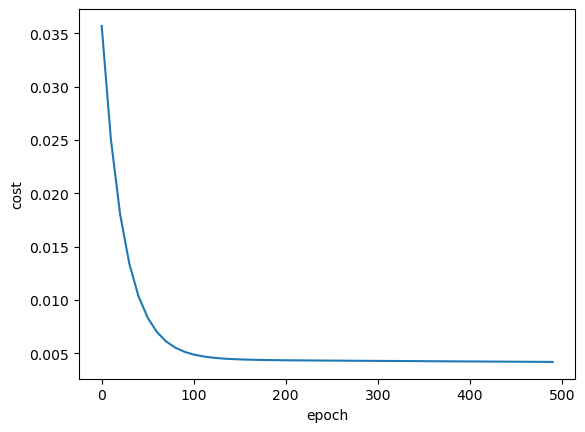

In [127]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list,cost_list)

In [128]:
#Lets do some predictions now depend on our calculate bias and weight value 

In [153]:
def stochastic_gradient_descent(X, y_true, epochs, learning_rate = 0.01):
 
    number_of_features = X.shape[1]
    # numpy array with 1 row and columns equal to number of features. In 
    # our case number_of_features = 3 (area, bedroom and age)
    w = np.ones(shape=(number_of_features)) 
    b = 0
    total_samples = X.shape[0]
    
    cost_list = []
    epoch_list = []
    
    for i in range(epochs):    
        random_index = np.random.randint(0,total_samples-1) # random index from total samples
        sample_x = X[random_index]
        sample_y = y_true[random_index]
        
        y_predicted = np.dot(w, sample_x.T) + b
    
        w_grad = -(2/total_samples)*(sample_x.T.dot(sample_y-y_predicted))
        b_grad = -(2/total_samples)*(sample_y-y_predicted)
        
        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad
        
        cost = np.square(sample_y-y_predicted)
        
        if i%100==0: # at every 100th iteration record the cost and epoch value
            cost_list.append(cost)
            epoch_list.append(i)
        
    return w, b, cost, cost_list, epoch_list

w_sgd, b_sgd, cost_sgd, cost_list_sgd, epoch_list_sgd = stochastic_gradient_descent(scaled_X,scaled_y.reshape(scaled_y.shape[0],),10000)
w_sgd, b_sgd, cost_sgd

(array([0.999821  , 0.99974872]), -0.0016161848597741081, 0.03238985700230804)

In [154]:
w, b

(array([0.9686242 , 0.94375831]), -0.16600459088364622)

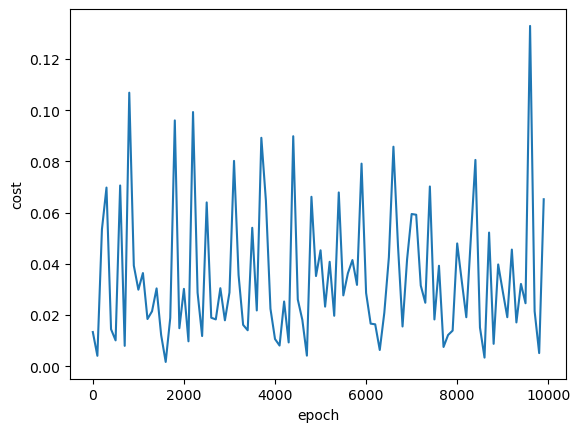

In [155]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list_sgd,cost_list_sgd)